In [5]:
# Import Your Libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Part 1

### Your Histogram Equalization Function

In [6]:
def hist_equ(image:np.ndarray):
    '''
    input:
    image (ndarray): input image
    output:
    output_image (ndarray): enhanced image
    '''
    
    ############
    # Your code
    # Start
    # get the histogram
    count=np.bincount(image.reshape((-1)))
    z = np.zeros((256),dtype=np.int)
    z[:len(count)] = count.copy()
    count = z.copy()

    # histogram equalization
    n = count.sum() # number of all pixels
    z = np.zeros((256),dtype=np.int32)
    z[0] = count[0]
    for i in range(1,256):
        z[i] = z[i-1]+count[i]

    output_t=(255/n *z) # new transform of pixels

    # print(output_t)
    output_image = image.reshape((-1)).copy()

    for i in range(len(output_image)):
        output_image[i] = output_t[output_image[i]] # replace pixels with new transform
    


    output_image = output_image.reshape(image.shape)
    # End
    
    return output_image

C:\Users\Asus\AppData\Local\Temp\ipykernel_17212\345791109.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  z = np.zeros((256),dtype=np.int)


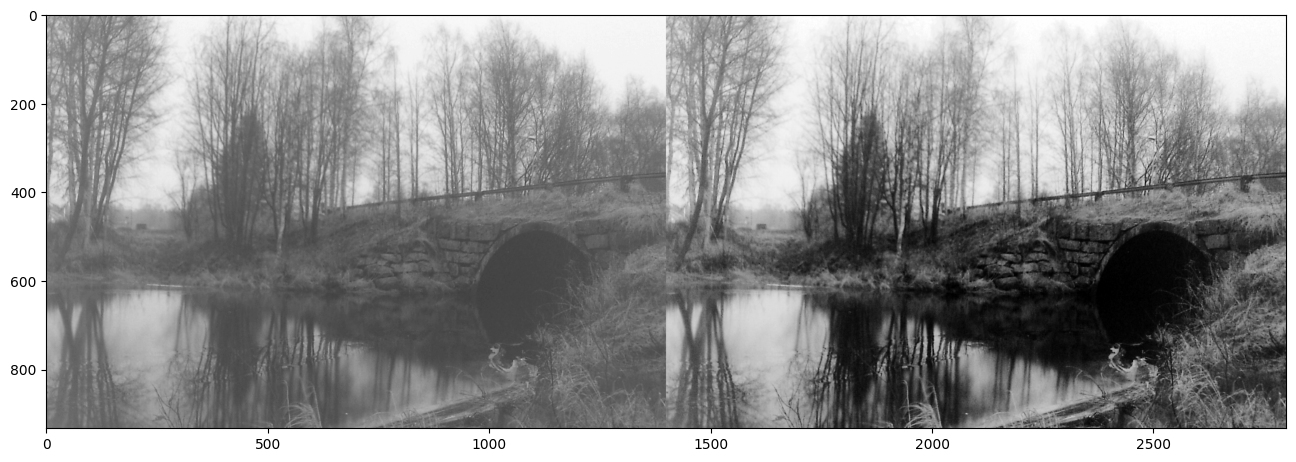

In [7]:
img = cv2.imread('./River.jpg', 0)

### YOUR CODE ###
# START
equ = hist_equ(img)
# END
# print(len(equ))
res = np.hstack((img, equ)) #stacking images side-by-side

plt.figure(figsize=(16, 16))
plt.imshow(res, cmap='gray')

### Histogram Equalization OpenCV Library

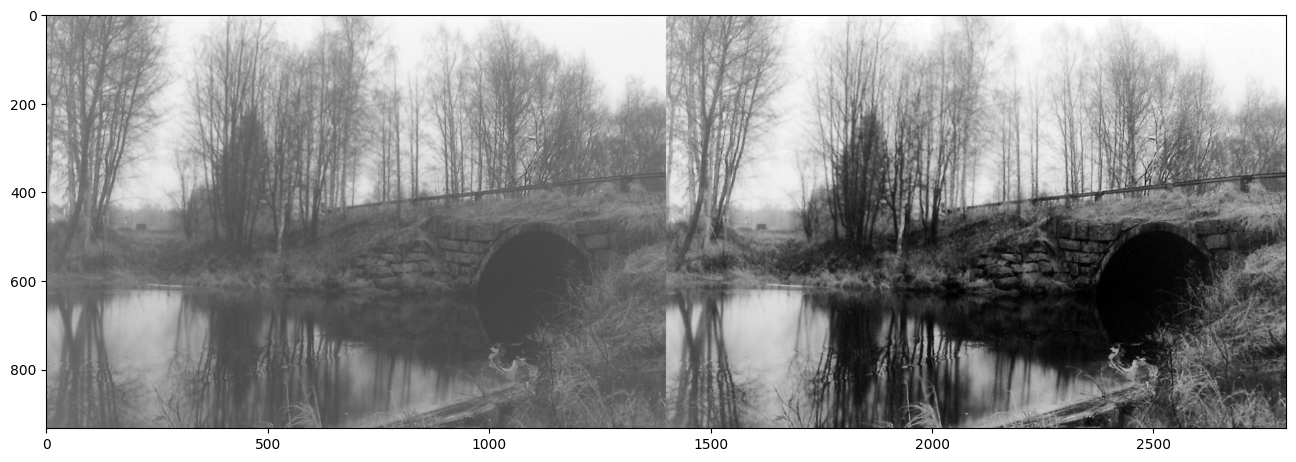

In [8]:
img = cv2.imread('River.jpg', 0)

### YOUR CODE ###
# START
equ = cv2.equalizeHist(img)
# END

res = np.hstack((img, equ)) #stacking images side-by-side

plt.figure(figsize=(16, 16))
plt.imshow(res, cmap='gray')

## Part 2

### CLAHE OpenCV Library

In [11]:
def CLAHE(image, gridSize, clip_limit):
    '''
    inputs:
    image (ndarray): input image
    gridSize (tuple): window size
    clip_limit (int): threshold for contrast limiting
    output:
    output_image (ndarray): improved image
    '''

    ############
    # Your code
    # Start
    
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=gridSize)
    output_image = clahe.apply(img)
    
    # End

    return output_image
    

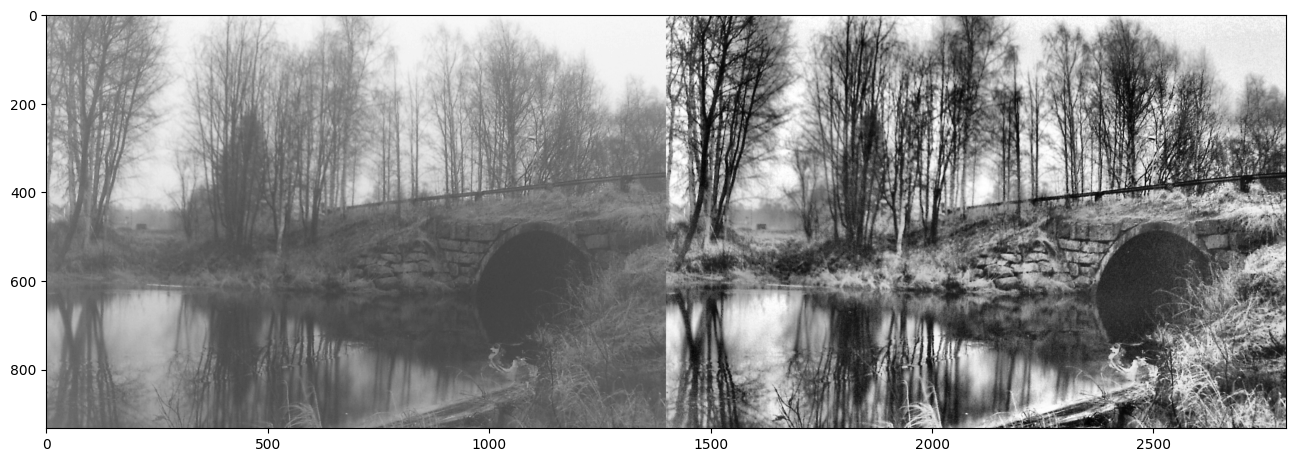

In [28]:
img = cv2.imread('River.jpg', 0)

### YOUR CODE ###
# START
clh = CLAHE(img,(8,8),5)
# END

res = np.hstack((img, clh)) #stacking images side-by-side

plt.figure(figsize=(16, 16))
plt.imshow(res, cmap='gray')

## Part 3
Repeat for City image

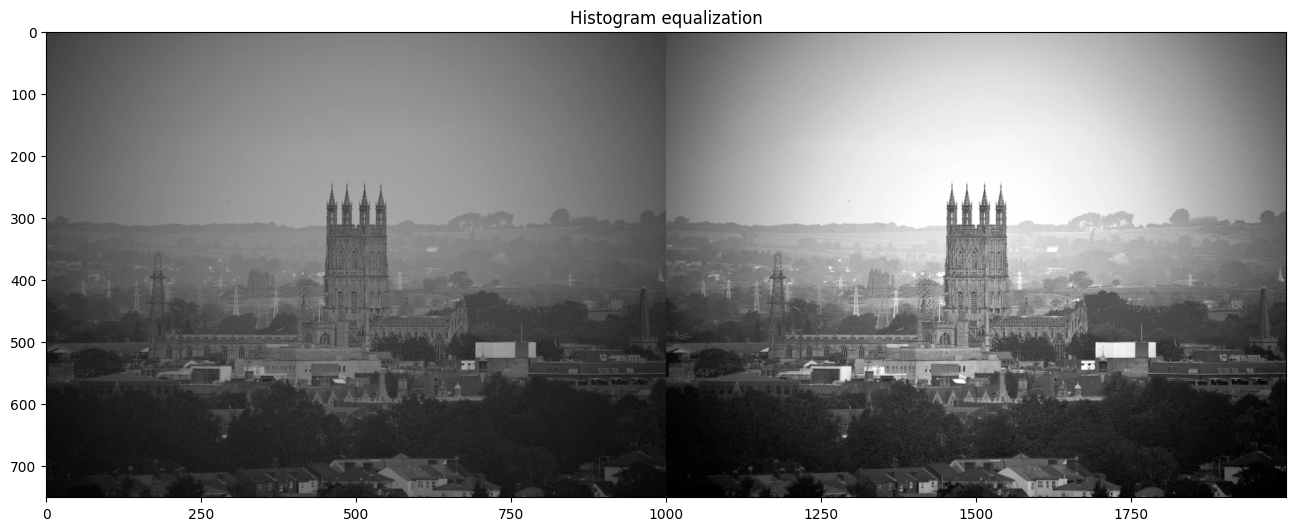

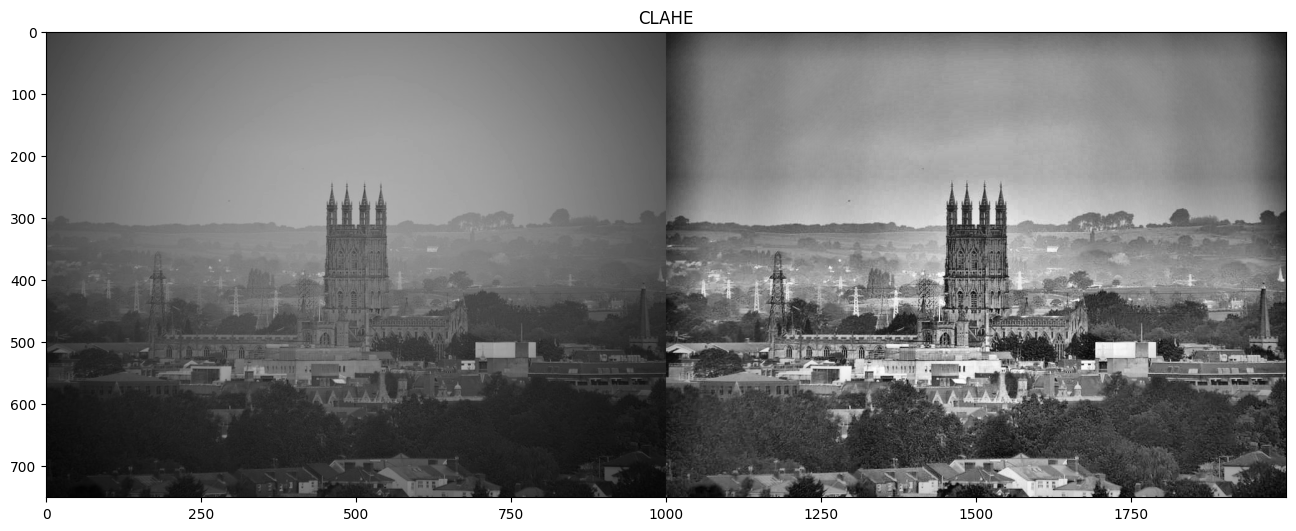

In [31]:
img = cv2.imread('./City.jpg', 0)


equ = cv2.equalizeHist(img)
# END

res = np.hstack((img, equ)) #stacking images side-by-side

plt.figure(figsize=(16, 16))
plt.title("Histogram equalization")
plt.imshow(res, cmap='gray')

clh = CLAHE(img,(8,8),4)

res = np.hstack((img, clh)) #stacking images side-by-side

plt.figure(figsize=(16, 16))
plt.title("CLAHE")
plt.imshow(res, cmap='gray')